In [2]:
import pandas as pd

In [10]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
df = pd.read_excel("base.xlsx")

In [22]:
df = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [23]:
# Separando as variáveis explicativas e alvo
X = df.drop('mau', axis=1)
y = df['mau']

In [24]:
# Dividindo os dados em conjuntos de treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [36]:
# Definindo o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier()

In [37]:
# Treinando o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier()

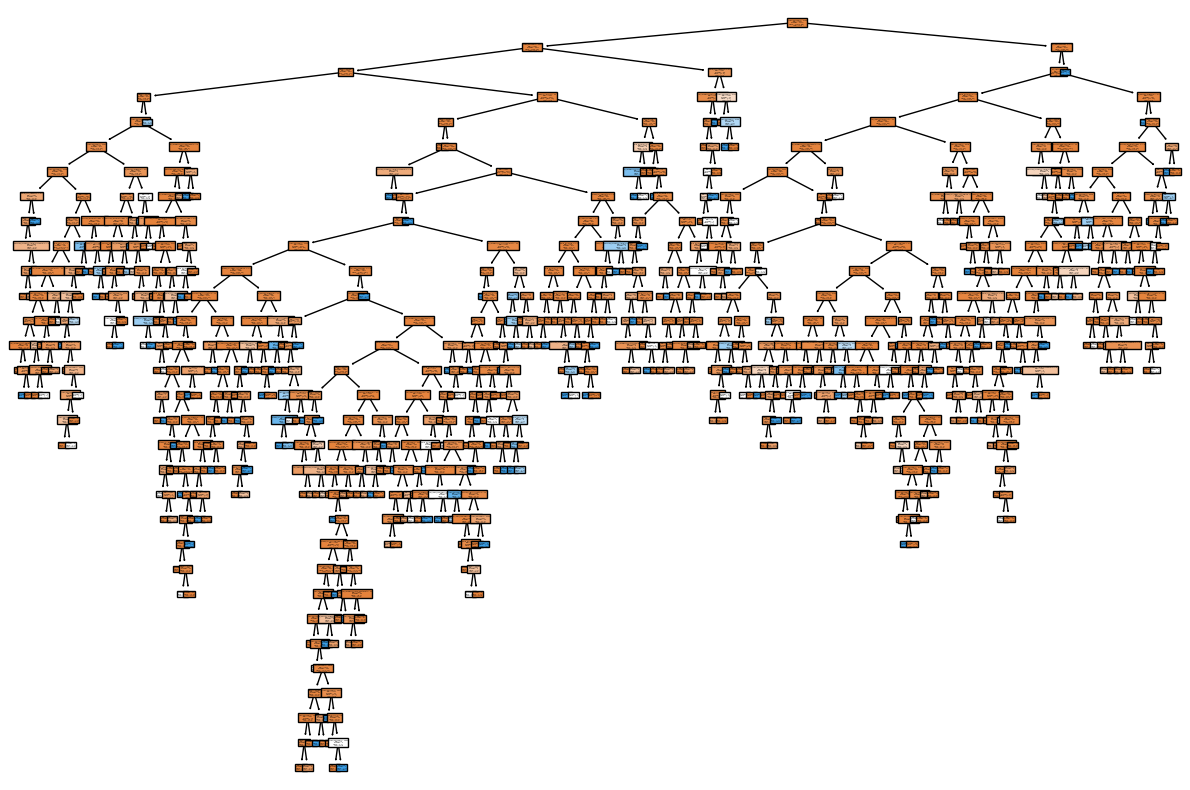

In [38]:
# Visualizando a árvore
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=['Bom', 'Mau'])
plt.show()

In [39]:
# Fazendo previsões na base de treinamento
y_pred_train = modelo_arvore.predict(X_train)

In [40]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_train)

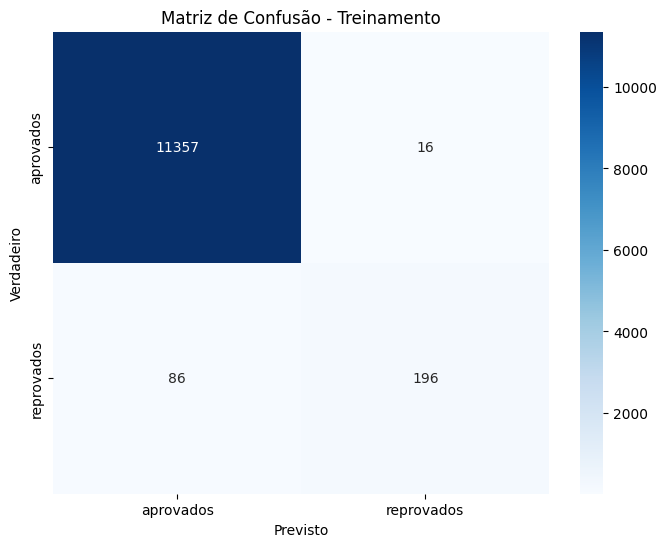

In [43]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados','reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Treinamento')
plt.show()

In [42]:
# Calculando a acurácia na base de treinamento
acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print("Acurácia na base de treinamento:", acuracia_treinamento)

Acurácia na base de treinamento: 0.9912483912483913


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [44]:
# Classificar a base de teste de acordo com a árvore treinada
y_pred_test = modelo_arvore.predict(X_valid)

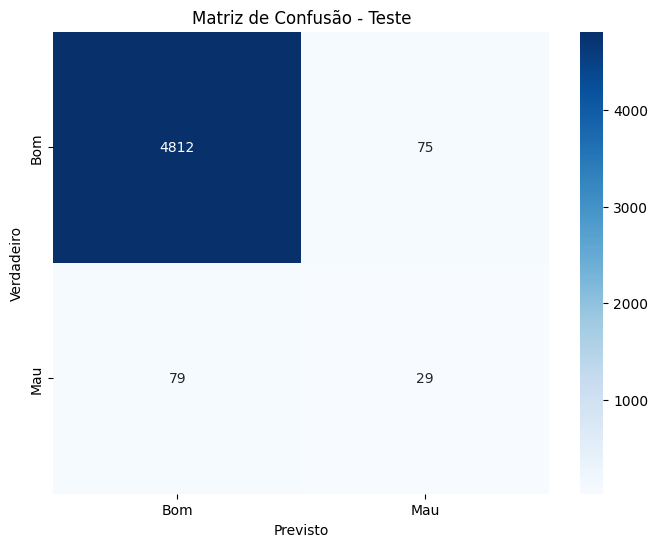

In [45]:
# Produzir a visualização da matriz de confusão para a base de teste
cm_test = confusion_matrix(y_valid, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Mau'], yticklabels=['Bom', 'Mau'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Teste')
plt.show()

In [46]:
# Calcular a acurácia da base de teste
acuracia_teste = accuracy_score(y_valid, y_pred_test)
print("Acurácia na base de teste:", acuracia_teste)

Acurácia na base de teste: 0.9691691691691692


In [47]:
# Comparar com a acurácia da base de treinamento
print("Acurácia na base de treinamento:", acuracia_treinamento)

Acurácia na base de treinamento: 0.9912483912483913


In [48]:
# Treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
modelo_arvore2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

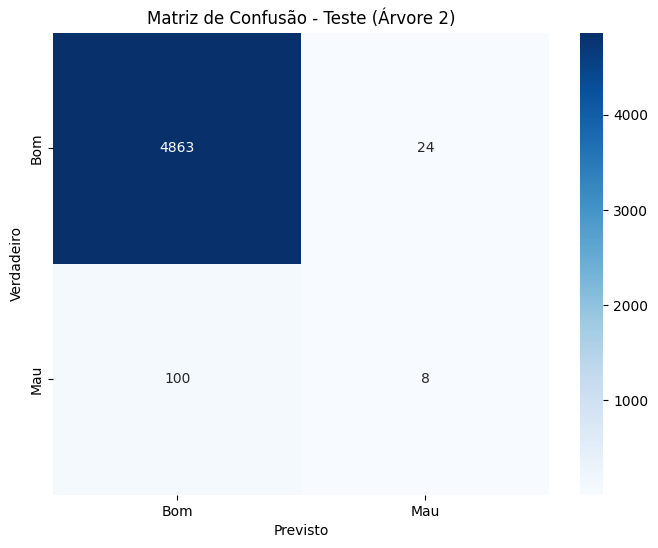

In [49]:
# Avaliar a matriz de classificação
y_pred_test2 = modelo_arvore2.predict(X_valid)
cm_test2 = confusion_matrix(y_valid, y_pred_test2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test2, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Mau'], yticklabels=['Bom', 'Mau'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Teste (Árvore 2)')
plt.show()

In [50]:
# Observar a distribuição da predição
prop_maus = sum(y_pred_test2) / len(y_pred_test2)
print("Proporção de proponentes classificados como 'maus':", prop_maus)

Proporção de proponentes classificados como 'maus': 0.006406406406406407


In [51]:
# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
acuracia_todos_bons = accuracy_score(y_valid, [False] * len(y_valid))
print("Acurácia se todos os contratos fossem classificados como 'bons':", acuracia_todos_bons)

Acurácia se todos os contratos fossem classificados como 'bons': 0.9783783783783784
